In [1]:
%run data_loader.ipynb
%run utils.ipynb

In [2]:
# Load test dataset according to a weather condition
test_dataset = RadarDataset(data_transform, './data/images_test/')
sunny_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_sunny/')
fog_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_fog/')
rain_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_rain/')
night_test_dataset = RadarDataset_each(data_transform, './data/each_weather/images_test_night/')

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn)
sunny_test_data_loader = torch.utils.data.DataLoader(sunny_test_dataset, batch_size=1, collate_fn=collate_fn)
fog_test_data_loader = torch.utils.data.DataLoader(fog_test_dataset, batch_size=1, collate_fn=collate_fn)
rain_test_data_loader = torch.utils.data.DataLoader(rain_test_dataset, batch_size=1, collate_fn=collate_fn)
night_test_data_loader = torch.utils.data.DataLoader(night_test_dataset, batch_size=1, collate_fn=collate_fn)

In [3]:
# Test

total_AP = []
sunny_AP = []
fog_AP = []
rain_AP = []
night_AP = []

model = get_model_instance_segmentation(2)
model.to(device)

for i in range(15):
    model.load_state_dict(torch.load('./model/ex1_'+str(i+1)+'.pt'))
    model.eval()
    
    # Total AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_total = torch.mean(AP)
    total_AP.append(mAP_total.item())
    print(f'Total AP : {mAP_total}'+'_'+str(i+1))
    
    
    # Sunny AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(sunny_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_sunny = torch.mean(AP)
    sunny_AP.append(mAP_sunny.item())
    print(f'Sunny AP : {mAP_sunny}'+'_'+str(i+1))
    
    # Fog AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(fog_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_fog = torch.mean(AP)
    fog_AP.append(mAP_fog.item())
    print(f'Fog AP : {mAP_fog}'+'_'+str(i+1))
    
    # Rain AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(rain_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_rain = torch.mean(AP)
    rain_AP.append(mAP_rain.item())
    print(f'Rain AP : {mAP_rain}'+'_'+str(i+1))
    
    # Night AP Caculation
    labels = []
    preds_adj_all = []
    annot_all = []
    for im, annot in tqdm(night_test_data_loader, position = 0, leave = True):
        im = list(img.to(device) for img in im)
        for t in annot:
            labels += t['labels']
        with torch.no_grad():
            preds_adj = make_prediction(model, im, 0.5)
            preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
            preds_adj_all.append(preds_adj)
            annot_all.append(annot)
    sample_metrics = []
    for batch_i in range(len(preds_adj_all)):
        sample_metrics += get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5) 
    true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]
    precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
    mAP_night = torch.mean(AP)
    night_AP.append(mAP_night.item())
    print(f'Night AP : {mAP_night}'+'_'+str(i+1))

100%|█████████████████████████████████████████| 749/749 [01:14<00:00, 10.01it/s]


Total AP : 0.9548994069153842_1


100%|█████████████████████████████████████████| 300/300 [00:30<00:00,  9.87it/s]


Sunny AP : 0.9678494710761054_1


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.34it/s]


Fog AP : 0.6271428556101668_1


100%|█████████████████████████████████████████| 286/286 [00:29<00:00,  9.68it/s]


Rain AP : 0.9583775731909512_1


100%|█████████████████████████████████████████| 156/156 [00:15<00:00,  9.97it/s]


Night AP : 0.8990017202390437_1


100%|█████████████████████████████████████████| 749/749 [01:16<00:00,  9.78it/s]


Total AP : 0.9430255959869598_2


100%|█████████████████████████████████████████| 300/300 [00:30<00:00,  9.69it/s]


Sunny AP : 0.9605819998489018_2


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.15it/s]


Fog AP : 0.6874999925494194_2


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.53it/s]


Rain AP : 0.9446637062752465_2


100%|█████████████████████████████████████████| 156/156 [00:15<00:00,  9.80it/s]


Night AP : 0.8823073003820596_2


100%|█████████████████████████████████████████| 749/749 [01:18<00:00,  9.58it/s]


Total AP : 0.9544420327746224_3


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.56it/s]


Sunny AP : 0.9684756632753064_3


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.06it/s]


Fog AP : 0.6634920582884831_3


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.39it/s]


Rain AP : 0.9573255242993497_3


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.65it/s]


Night AP : 0.8975210189857066_3


100%|█████████████████████████████████████████| 749/749 [01:18<00:00,  9.52it/s]


Total AP : 0.9510470364154102_4


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.46it/s]


Sunny AP : 0.957868446228229_4


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.00it/s]


Fog AP : 0.699999988079071_4


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.31it/s]


Rain AP : 0.953280694323464_4


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.61it/s]


Night AP : 0.9190422019628777_4


100%|█████████████████████████████████████████| 749/749 [01:18<00:00,  9.51it/s]


Total AP : 0.9429078780102955_5


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.42it/s]


Sunny AP : 0.9616769659460083_5


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00,  9.90it/s]


Fog AP : 0.4000000059604645_5


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.31it/s]


Rain AP : 0.9465095956259972_5


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.56it/s]


Night AP : 0.875649764129335_5


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.41it/s]


Total AP : 0.9546237100224317_6


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.42it/s]


Sunny AP : 0.9699643616584552_6


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00,  9.75it/s]


Fog AP : 0.5380952593826116_6


100%|█████████████████████████████████████████| 286/286 [00:31<00:00,  9.22it/s]


Rain AP : 0.9570628827561443_6


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.62it/s]


Night AP : 0.9021683937099958_6


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.38it/s]


Total AP : 0.9578450163662282_7


100%|█████████████████████████████████████████| 300/300 [00:32<00:00,  9.35it/s]


Sunny AP : 0.9763615941528663_7


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00,  9.95it/s]


Fog AP : 0.4000000059604645_7


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.23it/s]


Rain AP : 0.9619495752115306_7


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.58it/s]


Night AP : 0.8915818565756908_7


100%|█████████████████████████████████████████| 749/749 [01:20<00:00,  9.32it/s]


Total AP : 0.958315851940192_8


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.40it/s]


Sunny AP : 0.9719160996186886_8


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.02it/s]


Fog AP : 0.4833333323399227_8


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.25it/s]


Rain AP : 0.9619968397542067_8


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.52it/s]


Night AP : 0.90562829502041_8


100%|█████████████████████████████████████████| 749/749 [01:20<00:00,  9.31it/s]


Total AP : 0.9556722530224171_9


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.45it/s]


Sunny AP : 0.9735811320515317_9


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.09it/s]


Fog AP : 0.6000000238418579_9


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.27it/s]


Rain AP : 0.9613243055290184_9


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.51it/s]


Night AP : 0.8815361378532316_9


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.43it/s]


Total AP : 0.9577699407593485_10


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.45it/s]


Sunny AP : 0.9772046007206683_10


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.19it/s]


Fog AP : 0.585714307001659_10


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.32it/s]


Rain AP : 0.9600637113914736_10


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.68it/s]


Night AP : 0.8948710466833774_10


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.47it/s]


Total AP : 0.9380422889953053_11


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.46it/s]


Sunny AP : 0.9626331513418265_11


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.12it/s]


Fog AP : 0.5_11


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.36it/s]


Rain AP : 0.9412202107766454_11


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.65it/s]


Night AP : 0.8582529685480509_11


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.44it/s]


Total AP : 0.9559008286817878_12


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.49it/s]


Sunny AP : 0.973773690025844_12


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.07it/s]


Fog AP : 0.6874999925494194_12


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.33it/s]


Rain AP : 0.9581569766913454_12


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.66it/s]


Night AP : 0.8961010637846449_12


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.40it/s]


Total AP : 0.9554820322825357_13


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.43it/s]


Sunny AP : 0.9764899717150328_13


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.06it/s]


Fog AP : 0.585714307001659_13


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.36it/s]


Rain AP : 0.956445669343509_13


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.64it/s]


Night AP : 0.8948134758331463_13


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.42it/s]


Total AP : 0.9483020216213944_14


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.45it/s]


Sunny AP : 0.967485282235856_14


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.03it/s]


Fog AP : 0.6874999925494194_14


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.30it/s]


Rain AP : 0.95361036285464_14


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.62it/s]


Night AP : 0.8688237513898862_14


100%|█████████████████████████████████████████| 749/749 [01:19<00:00,  9.42it/s]


Total AP : 0.959134988332746_15


100%|█████████████████████████████████████████| 300/300 [00:31<00:00,  9.42it/s]


Sunny AP : 0.9751725590589295_15


100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 10.05it/s]


Fog AP : 0.5_15


100%|█████████████████████████████████████████| 286/286 [00:30<00:00,  9.26it/s]


Rain AP : 0.963077770122581_15


100%|█████████████████████████████████████████| 156/156 [00:16<00:00,  9.65it/s]

Night AP : 0.8994821583549246_15


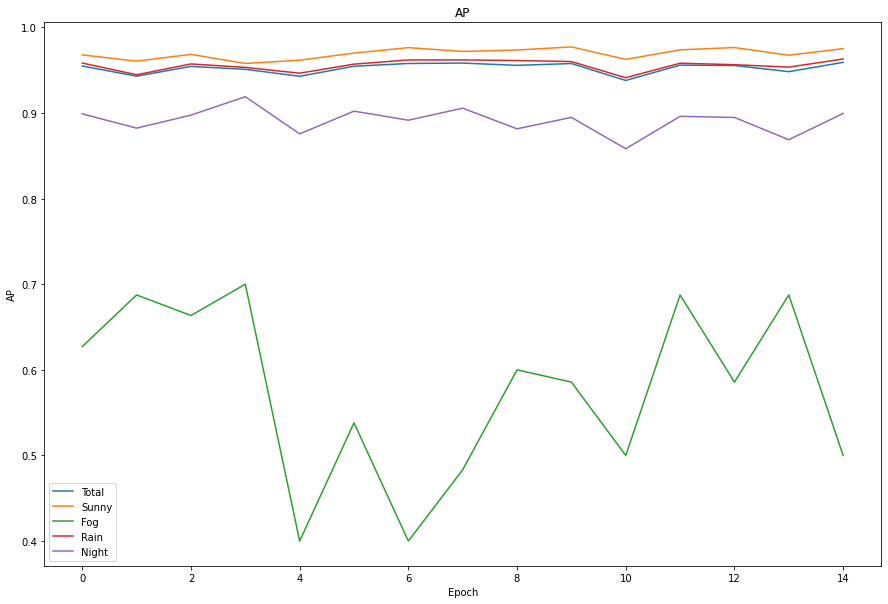

In [4]:
# Test result

y1 = total_AP
y2 = sunny_AP
y3 = fog_AP
y4 = rain_AP
y5 = night_AP
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Total")
plt.plot(x, y2, label = "Sunny")
plt.plot(x, y3, label = "Fog")
plt.plot(x, y4, label = "Rain")
plt.plot(x, y5, label = "Night")
plt.xlabel('Epoch')
plt.ylabel('AP')
plt.title('AP')
plt.legend()
plt.show()

In [5]:
# Find max APs

(m,i) = max((v,i) for i,v in enumerate(total_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(sunny_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(fog_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(rain_AP))
print (m,i)

(m,i) = max((v,i) for i,v in enumerate(night_AP))
print (m,i)

0.959134988332746 14
0.9772046007206683 9
0.699999988079071 3
0.963077770122581 14
0.9190422019628777 3


In [6]:
print(total_AP)
print(sunny_AP)
print(fog_AP)
print(rain_AP)
print(night_AP)

[0.9548994069153842, 0.9430255959869598, 0.9544420327746224, 0.9510470364154102, 0.9429078780102955, 0.9546237100224317, 0.9578450163662282, 0.958315851940192, 0.9556722530224171, 0.9577699407593485, 0.9380422889953053, 0.9559008286817878, 0.9554820322825357, 0.9483020216213944, 0.959134988332746]
[0.9678494710761054, 0.9605819998489018, 0.9684756632753064, 0.957868446228229, 0.9616769659460083, 0.9699643616584552, 0.9763615941528663, 0.9719160996186886, 0.9735811320515317, 0.9772046007206683, 0.9626331513418265, 0.973773690025844, 0.9764899717150328, 0.967485282235856, 0.9751725590589295]
[0.6271428556101668, 0.6874999925494194, 0.6634920582884831, 0.699999988079071, 0.4000000059604645, 0.5380952593826116, 0.4000000059604645, 0.4833333323399227, 0.6000000238418579, 0.585714307001659, 0.5, 0.6874999925494194, 0.585714307001659, 0.6874999925494194, 0.5]
[0.9583775731909512, 0.9446637062752465, 0.9573255242993497, 0.953280694323464, 0.9465095956259972, 0.9570628827561443, 0.9619495752115

In [7]:
i = 14
print (total_AP[i])
print (sunny_AP[i])
print (fog_AP[i])
print (rain_AP[i])
print (night_AP[i])

0.959134988332746
0.9751725590589295
0.5
0.963077770122581
0.8994821583549246
